c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to proper

In [1]:
%matplotlib inline

c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:298: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  "No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps."


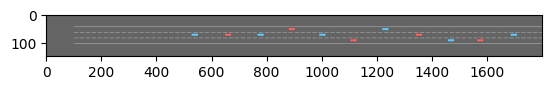

In [3]:
env.reset()
plt.imshow(env.render(mode="rgb_array"))
env.close()
plt.show()

In [2]:
from pprint import pprint
from tqdm.notebook import trange
import gym
import highway_env
import os 
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from matplotlib import pyplot as pyplot
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#Create Environment
env = gym.make('ma-highway-v0')

#load Model
model = A2C.load('Training/Saved Models/best_model', env=env)

speed_metrics = []
position_metrics = []
for episode in trange(1, desc="Test episodes"):
    obs, done = env.reset(), False
    step = 1
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        position_metrics = info["position_metrics"]
        speed_metrics = info["speed_metrics"]
        step += 1
env.close()

C:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
C:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__
C:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to proper

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Test episodes:   0%|          | 0/1 [00:00<?, ?it/s]

## DLC Vehicle vs MLC Vehicle Avg Speed Comparison

In [4]:
import numpy
speed_metrics_np = numpy.array(speed_metrics)
print(speed_metrics_np)

[[  0.          20.99353792  20.83764722  21.14942861]
 [  1.          21.54981148  20.96679753  22.13282543]
 [  2.          22.04427687  21.08159781  23.00695594]
 ...
 [448.          26.          22.          30.        ]
 [449.          26.          22.          30.        ]
 [450.          26.          22.          30.        ]]


In [5]:
#divide numpy into individual lists

time_steps = speed_metrics_np[:, 0]
avg_mlc_speed = speed_metrics_np[:, 2]
avg_dlc_speed = speed_metrics_np[:, 3]
print(avg_mlc_speed)
avg_mlc_speed.shape

[20.83764722 20.96679753 21.08159781 21.18364249 21.27434888 21.35497679
 21.42664603 21.49035203 21.54697958 21.59731518 21.64205794 21.68182928
 21.71718158 21.74860585 21.77653853 21.80136759 21.82343785 21.84305587
 21.86049411 21.87599476 21.88977312 21.90202055 21.91290716 21.92258414
 21.9311859  21.93883191 21.94562837 21.95166966 21.9570397  21.96181306
 21.96605606 21.96982761 21.97318009 21.97616008 21.97880896 21.98116352
 21.98325647 21.98511686 21.98677054 21.98824048 21.98954709 21.99070853
 21.99174091 21.99265859 21.9934743  21.99419938 21.99484389 21.99541679
 21.99592604 21.9963787  21.99678107 21.99713873 21.99745665 21.99773924
 21.99799044 21.99821372 21.9984122  21.99858862 21.99874544 21.99888483
 21.99900874 21.99911888 21.99921678 21.99930381 21.99938116 21.99944992
 21.99951104 21.99956537 21.99961366 21.99965659 21.99969475 21.99972866
 21.99975881 21.99978561 21.99980943 21.99983061 21.99984943 21.99986616
 21.99988103 21.99989425 21.999906   21.99991644 21

(451,)

In [11]:
import pandas as pd

data = {'Time Steps(sec)': time_steps[:50],
        'Avg MLC Speed(m/s)': avg_mlc_speed[:50],
        'Avg DLC Speed(m/s)': avg_dlc_speed[:50]}
speed_metrics_df = pd.DataFrame(data)

In [8]:
speed_metrics_df.head()

,Time Steps(sec),Avg MLC Speed(m/s),Avg DLC Speed(m/s)
0,0.0,20.837647,21.149429
1,1.0,20.966798,22.132825
2,2.0,21.081598,23.006956
3,3.0,21.183642,23.783961
4,4.0,21.274349,24.474632


'plt.plot([0:50,0], history[0:50,2:])\nplt.xlabel("Time StepS")\nplt.ylabel("Speed m/s")\nplt.show()'

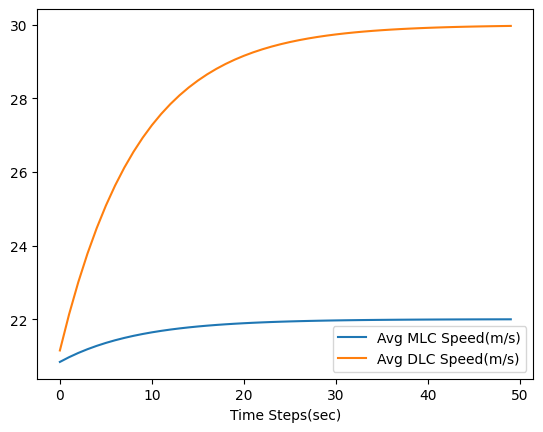

In [12]:
speed_metrics_df.plot(x="Time Steps(sec)", y=['Avg MLC Speed(m/s)', 'Avg DLC Speed(m/s)'])

## DLC Vehicles position vs MLC Vehicle positions

In [14]:
position_metrics_np = numpy.array(position_metrics)
print(position_metrics_np)

[[0.00000000e+00 9.06199015e+01 1.11563141e+02 ... 3.83356513e+02
  4.06842838e+02 4.28535650e+02]
 [1.00000000e+00 9.19848095e+01 1.12974096e+02 ... 3.84790985e+02
  4.08188171e+02 4.29965272e+02]
 [2.00000000e+00 9.33610241e+01 1.14450501e+02 ... 3.86278815e+02
  4.09536173e+02 4.31458269e+02]
 ...
 [4.48000000e+02 7.46770741e+02 1.00226174e+03 ... 1.27419574e+03
  1.06274870e+03 1.31940225e+03]
 [4.49000000e+02 7.48237407e+02 1.00426174e+03 ... 1.27619574e+03
  1.06421536e+03 1.32140225e+03]
 [4.50000000e+02 7.49704074e+02 1.00626174e+03 ... 1.27819574e+03
  1.06568203e+03 1.32340225e+03]]


In [16]:
time_steps = position_metrics_np[:, 0]
DLC_Vehicle1 = position_metrics_np[:, 2]
DLC_Vehicle2 = position_metrics_np[:, 4]
MLC_Vehicle1 = position_metrics_np[:, 3]
MLC_Vehicle2 = position_metrics_np[:, 5]

In [19]:
data = {'Time Steps(sec)': time_steps,
        'DLC_Vehicle1(m)': DLC_Vehicle1,
        'DLC_Vehicle2(m)': DLC_Vehicle2,
        'MLC_Vehicle1(m)': MLC_Vehicle1,
        'MLC_Vehicle2(m)': MLC_Vehicle2}
position_metrics_df = pd.DataFrame(data)

<AxesSubplot:xlabel='Time Steps(sec)'>

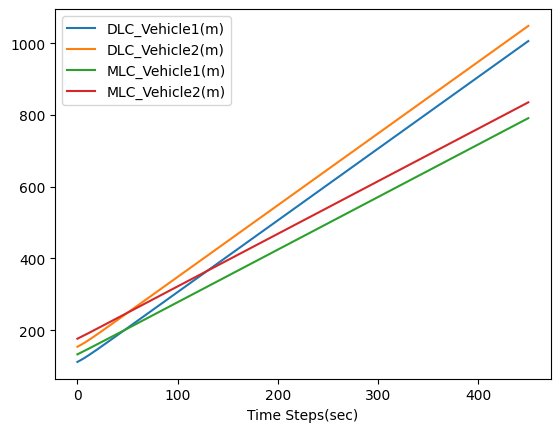

In [20]:
position_metrics_df.plot(x="Time Steps(sec)", y=['DLC_Vehicle1(m)', 'DLC_Vehicle2(m)', 'MLC_Vehicle1(m)', 'MLC_Vehicle2(m)'])

In [ ]:
avg_mlc_speed.shape
positions = numpy.array(positions)
plt.plot(positions[:1001,0], positions[:,5:9])
plt.xlabel("Time Step")
plt.ylabel("Vehicle Positions")
plt.show()

## Graph Human Vehicle Position vs DLC vehicle Position

In [66]:
import numpy as np
import pandas as pd
import gym
import highway_env
import os 
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from matplotlib import pyplot as pyplot
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#lists
position_human = []
position_dlc = []
timesteps = []

#Fill Steps
for i in range(1,51):
    timesteps.append(i)

#Highway Environment
env = gym.make('highway-v0')
env.config["lanes_count"] = 3
env.config["vehicles_count"] = 16
env.config["vehicles_density"] = 1.2
env.config["controlled_vehicles"] = 1

#TestLoop
for episode in range(1):
    obs, done = env.reset(), False
    print("episode " + str(episode + 1))
    timestep = 1
    while not done:
    #for i in range(3):
        action = 1
        obs, reward, done, info = env.step(action)
        #env.render('human')
        position_human.append([timestep, info["position"]])
        timestep += 1

#Multi Agent Highway Environment
env = gym.make('ma-highway-v0')
model = A2C.load('Training/Saved Models/best_model', env=env)

#TestLoop
for episode in trange(1, desc="Test episodes"):
    obs, done = env.reset(), False
    print("episode " + str(episode))
    timestep = 1
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        positions = info["position_metrics"]
        history = info["speed_metrics"]
        position_dlc.append([timestep, info["position_metrics"][-1][2]])
        timestep += 1
env.close()

C:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "
C:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
C:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\wrappe

episode 1
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


C:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 4)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "
C:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:269: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  "Function `env.seed(seed)` is marked as deprecated and will be removed in the future. "


Test episodes:   0%|          | 0/1 [00:00<?, ?it/s]

episode 0


In [69]:
position_human_list = np.array(position_human)
position_human_list.shape

(44, 2)

In [72]:
#convert to NumpyArray
position_human = np.array(position_human_list)

#Create Dataframe
position_df = pd.DataFrame(position_human[:,1], columns=['HumanVehicle_position'])

df2 = pd.DataFrame({'HumanVehicle_position': [0, 0,0,0,0,0]})
df2.shape
position_df = position_df.append(df2 ,ignore_index = True)
position_df['Time steps(Sec)'] = timesteps
print(position_df)

    HumanVehicle_position  Time steps(Sec)
0              113.559284                1
1              134.737694                2
2              155.549529                3
3              176.210110                4
4              196.815138                5
5              217.409889                6
6              238.014926                7
7              258.638717                8
8              279.283919                9
9              299.950496               10
10             320.637256               11
11             341.342596               12
12             362.064846               13
13             382.802416               14
14             403.553851               15
15             424.317849               16
16             445.093248               17
17             465.879019               18
18             486.674246               19
19             507.478121               20
20             528.289922               21
21             549.109010               22
22         

In [83]:
#add DLC Position Column

position_dlc_list = np.array(position_dlc)
position_df['DlcVehicle_position'] = pd.Series(position_dlc_list[:,1])
position_df.replace(0, np.nan, inplace=True)
position_df.tail()

,HumanVehicle_position,Time steps(Sec),DlcVehicle_position
45,NaN,46,NaN
46,NaN,47,NaN
47,NaN,48,NaN
48,NaN,49,NaN
49,NaN,50,NaN


<AxesSubplot:xlabel='Time steps(Sec)'>

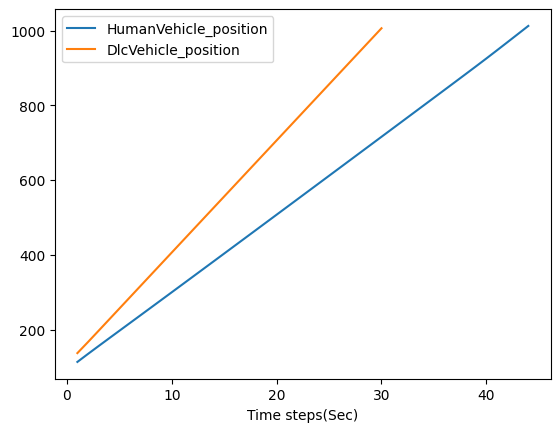

In [84]:
#Plot the graph
position_df.plot(x="Time steps(Sec)", y=["HumanVehicle_position", "DlcVehicle_position"])